In [1]:
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights = 'imagenet',include_top=False, input_shape=(150,150,3))

In [2]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [3]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = './datasets/cats_and_dogs_small'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [13]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
#fine tunning

In [15]:
conv_base.trainable = True

set_tranable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_tranable = True
    if set_tranable:
        layer.trainable = True
    else:
        layer.trainable = False

In [18]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),loss='binary_crossentropy',metrics=['acc'])

history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 14s 127ms/step - loss: 0.1824 - acc: 0.9225 - val_loss: 0.1490 - val_acc: 0.9420
Epoch 2/100
100/100 [==============================] - 12s 124ms/step - loss: 0.1439 - acc: 0.9425 - val_loss: 0.1344 - val_acc: 0.9430
Epoch 3/100
100/100 [==============================] - 12s 124ms/step - loss: 0.1156 - acc: 0.9545 - val_loss: 0.1785 - val_acc: 0.9350
Epoch 4/100
100/100 [==============================] - 13s 134ms/step - loss: 0.0995 - acc: 0.9635 - val_loss: 0.1517 - val_acc: 0.9430
Epoch 5/100
100/100 [==============================] - 13s 128ms/step - loss: 0.0907 - acc: 0.9625 - val_loss: 0.1229 - val_acc: 0.9490
Epoch 6/100
100/100 [==============================] - 13s 125ms/step - loss: 0.0824 - acc: 0.9690 - val_loss: 0.1573 - val_acc: 0.9440
Epoch 7/100
100/100 [==============================] - 12s 124ms/step - loss: 0.0633 - acc: 0.9745 - val_loss: 0.1447 - val_acc: 0.9500
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 12s 124ms/step - loss: 0.0059 - acc: 0.9985 - val_loss: 0.5116 - val_acc: 0.9360
Epoch 62/100
100/100 [==============================] - 12s 124ms/step - loss: 0.0026 - acc: 0.9990 - val_loss: 0.3646 - val_acc: 0.9510
Epoch 63/100
100/100 [==============================] - 12s 124ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.3611 - val_acc: 0.9500
Epoch 64/100
100/100 [==============================] - 12s 124ms/step - loss: 7.7404e-04 - acc: 0.9995 - val_loss: 0.4009 - val_acc: 0.9470
Epoch 65/100
100/100 [==============================] - 13s 125ms/step - loss: 0.0043 - acc: 0.9975 - val_loss: 0.4156 - val_acc: 0.9460
Epoch 66/100
100/100 [==============================] - 12s 124ms/step - loss: 0.0030 - acc: 0.9995 - val_loss: 0.6946 - val_acc: 0.9300
Epoch 67/100
100/100 [==============================] - 12s 124ms/step - loss: 0.0084 - acc: 0.9965 - val_loss: 0.4351 - val_acc: 0.9450
Epoch 68/100
100/100 [===============

In [19]:
model.save('fineTuning_model.h5')

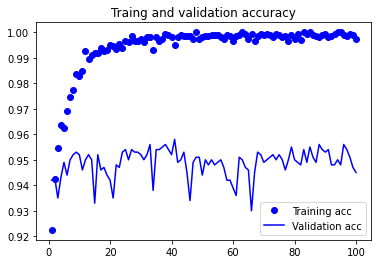

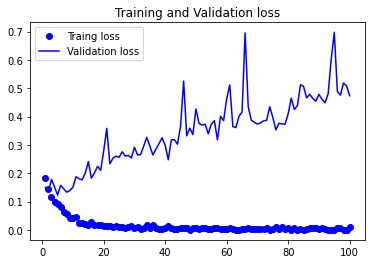

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Traing and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label = 'Traing loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()